## Tutorial de Classificação Neural do banco de dados MNIST

Autor: Natanael Junior (natmourajr@gmail.com)

Laboratorio de Processamento de Sinais - UFRJ

In [23]:
%time
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from sklearn import datasets
from sklearn import cross_validation
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop
import keras.callbacks as callbacks

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [21]:
%time
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

mnist_labels = ['0','1','2','3','4','5','6','7','8','9']
num_classes = 10


x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


In [ ]:
%time

# train a simple classifier

batch_size = 128
n_epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=n_epochs,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 60s - loss: 0.2472 - acc: 0.9233 - val_loss: 0.1119 - val_acc: 0.9662

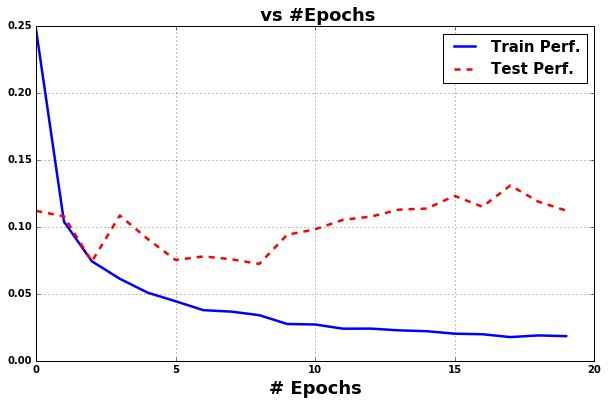

In [29]:
# Show train history

plt.rc('legend',**{'fontsize':15})

plt.rc('font', weight='bold')

fig1 = plt.figure(figsize=(10,6))

l1 = plt.plot(history.epoch,
              history.history['loss'],color=[0,0,1],
              linewidth=2.5,linestyle='solid',label='Train Perf.')
l2 = plt.plot(history.epoch,
              history.history['val_loss'],color=[1,0,0],
              linewidth=2.5,linestyle='dashed',label='Test Perf.')
cost = ''
if model.loss == 'mean_squared_error':
    cost = 'MSE'

plt.grid(True)
plt.xlabel("# Epochs",fontsize=18,fontweight='bold')
plt.ylabel(cost,fontsize=18,fontweight='bold')
plt.title(cost+" vs #Epochs",fontsize=18,fontweight='bold')
plt.legend()